# Support Vector Machines

The Support Vector Machine is a mathematical concept used to find a set of hyperplanes which can distantly classify the data points in higher dimenions in order to decrease variance. 

### Aim
The ex-showroom price and on-road price of cars is analysed based on the utility class of the vehicles. The goal is find the higher dimension plane which can classify the data and predict the class of a new car based its given ex-showroom price and on-road price.

### Data

The Data is about the **ex-showroom price**(excluding taxes, insurance etc) <br>
and the **on-road price**(including taxes, insurance etc) in Euros of a car.

**Note:** 
The data used in this example is generated in using a python program.

### Libraries Used

In [1]:
import pandas as pd
import numpy as np
from numpy import random, array
from sklearn import svm, datasets
from pylab import *
from itertools import cycle
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv("Data/CarPrice.csv")
df.head()

,ShowroomPrice,OnRoadPrice,Class
0,74664.46,78749.08,EcoFriendly
1,75545.11,82358.51,EcoFriendly
2,77069.73,78899.88,EcoFriendly
3,71461.80,80120.54,EcoFriendly
4,73945.13,78043.75,EcoFriendly


### Mapping of the Target data and Extracting the features

The data has to be mapped to numerical values for the calculatio purposes.

In [3]:
d = {'EcoFriendly': 1, 'Economy': 2,  'SUV': 3,'Luxury': 4  }
target_names = ['EcoFriendly', 'Economy',  'SUV', 'Luxury'] 
df['Class'] = df['Class'].map(d)

### Dropping the class from the original data set will give the feature list
features = df.drop('Class', axis=1).as_matrix()

### Only the class column is the target
target = np.squeeze(df.filter(['Class'], axis=1).as_matrix())

### Plotting the On-Road Price Vs Ex-Showroom Price

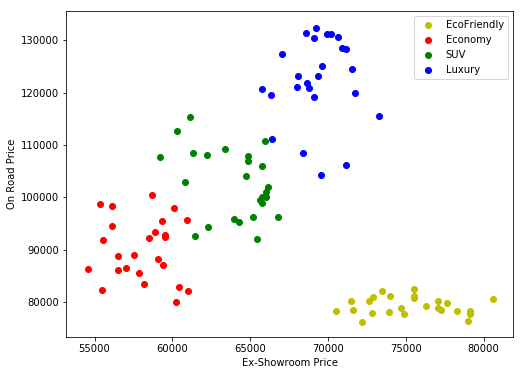

In [4]:
plt.figure(figsize=(8, 6))
plt.ylabel('On Road Price');
plt.xlabel('Ex-Showroom Price');
#plt.scatter(features[:,0], features[:,1], c=target.astype(np.float))

colors = cycle('yrgb')
target_ids = range(1,len(target_names)+1)

### Assigning the colors and plotting the graph
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(features[target == i, 0], features[target == i, 1], c=c, label=label)
    
plt.legend()
plt.show()

#### Observation:
We can observe there is 4 clusters of data as expected 

### Support Vector Classification (SVC)
As the graphs shows clusters of data which are not separable by any single line, we use SVC to find the hyperplanes which can categorise the data points.
<br><br>
A **lower C** is chosen because to avoid overfitting and it is almost impossible for a hyperplane to clasify the points
<br>
A **polynomial kernal** with the **degree 3** is used because as shown in the plot, the data points are not linear differentiated. 
**Note**: It may take time to run as the classification is bit harder because of the overlapping datapoints.
<br>

#### Training

In [5]:
C = .95

svc = svm.SVC(kernel='poly',degree=3, C=C).fit(features, target)

### Plot of the SVC Classification

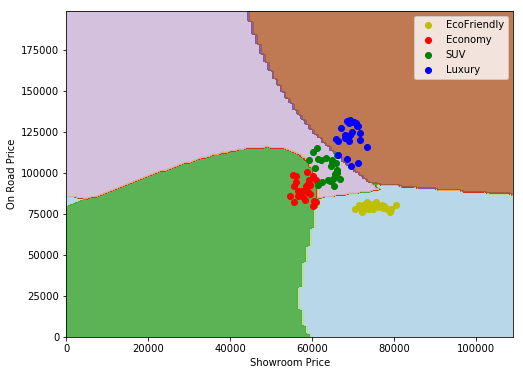

In [6]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 110000, 1000), np.arange(10, 200000, 1000))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.ylabel('On Road Price');
    plt.xlabel('Showroom Price');
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    #plt.scatter(features[:,0], features[:,1], c=target.astype(np.float))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(features[target == i, 0], features[target == i, 1], c=c, label=label)
    
    plt.legend()
    plt.show()
    
plotPredictions(svc)

### Prediciton
The category of the cars with following price is can be predicted using the SVC classifier we have trained.

1) Ex-showroom price : 20000, On-Road Price : 60000 <br>
2) Ex-showroom price : 50000, On-Road Price : 125000 <br>


In [7]:
print(svc.predict([[20000, 60000]]))

[2]


In [8]:
print(svc.predict([[50000, 125000]]))

[3]


### Result
According to the model, the **first car** belongs to **class 2** , which is **Economy** and <br>
the second car belong to class 3 , which is **SUV**.

### Conclusion
The SVC was used to classify the cars based on ex-showroom price and on-road price as catgories was not linearly separable.